# Understanding Embeddings in BERT

This notebook will help you understand how BERT converts words into vectors using embeddings.

## What You'll Learn:
1. How token embeddings work (word → vector)
2. How position embeddings work (position → vector)
3. How they combine to create input representations
4. Why embeddings are trainable parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')  # To import from parent directory

# Set random seed for reproducibility
np.random.seed(42)

## Part 1: Token Embeddings - Converting Words to Vectors

Think of token embeddings as a lookup table where each word has a unique vector.

In [2]:
# Let's create a simple embedding matrix
vocab_size = 10  # We have 10 words in our vocabulary
hidden_size = 4  # Each word becomes a 4-dimensional vector

# Initialize embedding matrix randomly
embedding_matrix = np.random.randn(vocab_size, hidden_size) * 0.1

# Let's give names to our vocabulary
vocab = ['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]', 
         'the', 'cat', 'sat', 'on', 'mat']

print("Embedding Matrix Shape:", embedding_matrix.shape)
print("\nEach word has a", hidden_size, "dimensional vector:")
print("\nFirst 5 word embeddings:")
for i in range(5):
    print(f"{vocab[i]:8s}: {embedding_matrix[i]}")

Embedding Matrix Shape: (10, 4)

Each word has a 4 dimensional vector:

First 5 word embeddings:
[PAD]   : [ 0.04967142 -0.01382643  0.06476885  0.15230299]
[UNK]   : [-0.02341534 -0.0234137   0.15792128  0.07674347]
[CLS]   : [-0.04694744  0.054256   -0.04634177 -0.04657298]
[SEP]   : [ 0.02419623 -0.19132802 -0.17249178 -0.05622875]
[MASK]  : [-0.10128311  0.03142473 -0.09080241 -0.14123037]


### How Embedding Lookup Works

When we have a word ID, we simply select that row from the embedding matrix:

In [3]:
# Example: Look up embeddings for "the cat sat"
word_ids = [5, 6, 7]  # IDs for 'the', 'cat', 'sat'

# Method 1: Loop (clear but slow)
embeddings_loop = []
for word_id in word_ids:
    embeddings_loop.append(embedding_matrix[word_id])
embeddings_loop = np.array(embeddings_loop)

# Method 2: Direct indexing (fast, what BERT uses)
embeddings_direct = embedding_matrix[word_ids]

print("Word IDs:", word_ids)
print("Words:", [vocab[i] for i in word_ids])
print("\nEmbeddings shape:", embeddings_direct.shape)
print("\nEmbedding for 'the':", embeddings_direct[0])
print("Embedding for 'cat':", embeddings_direct[1])
print("Embedding for 'sat':", embeddings_direct[2])

Word IDs: [5, 6, 7]
Words: ['the', 'cat', 'sat']

Embeddings shape: (3, 4)

Embedding for 'the': [ 0.14656488 -0.02257763  0.00675282 -0.14247482]
Embedding for 'cat': [-0.05443827  0.01109226 -0.11509936  0.0375698 ]
Embedding for 'sat': [-0.06006387 -0.02916937 -0.06017066  0.18522782]


### Visualizing Embeddings

Let's visualize our embedding matrix as a heatmap:

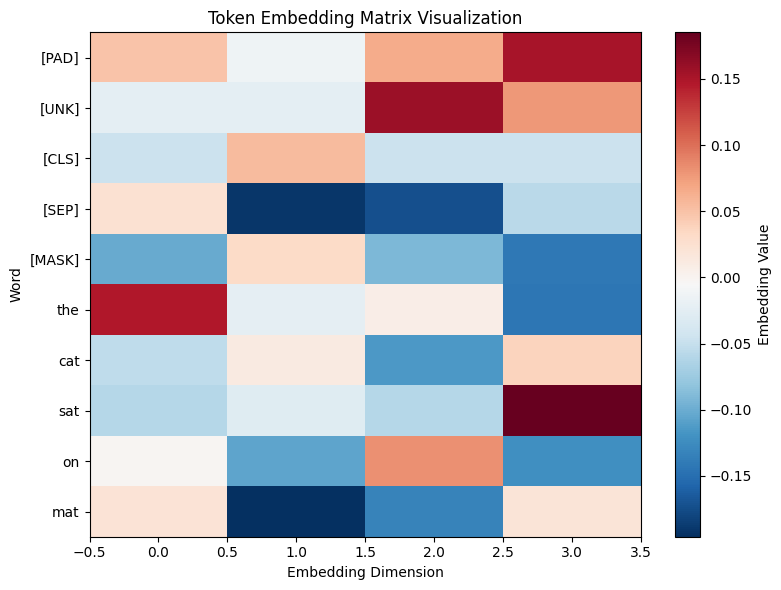

Each row is a word's vector representation.
Similar words should have similar patterns (after training).


In [4]:
plt.figure(figsize=(8, 6))
plt.imshow(embedding_matrix, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='Embedding Value')
plt.yticks(range(vocab_size), vocab)
plt.xlabel('Embedding Dimension')
plt.ylabel('Word')
plt.title('Token Embedding Matrix Visualization')
plt.tight_layout()
plt.show()

print("Each row is a word's vector representation.")
print("Similar words should have similar patterns (after training).")

## Part 2: Position Embeddings - Encoding Word Order

BERT needs to know word order. Position embeddings add this information.

In [5]:
# Create position embeddings
max_seq_length = 8  # Maximum sentence length
position_embeddings = np.random.randn(max_seq_length, hidden_size) * 0.1

print("Position Embeddings Shape:", position_embeddings.shape)
print("\nEach position (0 to 7) has its own vector:")
for i in range(4):
    print(f"Position {i}: {position_embeddings[i]}")

Position Embeddings Shape: (8, 4)

Each position (0 to 7) has its own vector:
Position 0: [ 0.07384666  0.01713683 -0.01156483 -0.03011037]
Position 1: [-0.1478522  -0.07198442 -0.04606388  0.10571222]
Position 2: [ 0.03436183 -0.17630402  0.0324084  -0.03850823]
Position 3: [-0.0676922   0.06116763  0.10309995  0.09312801]


### Combining Token and Position Embeddings

BERT adds token and position embeddings element-wise:

In [6]:
# Example sentence: "the cat sat"
sentence_ids = [5, 6, 7]
sentence_length = len(sentence_ids)

# Get token embeddings
token_embs = embedding_matrix[sentence_ids]  # [3, 4]

# Get position embeddings for positions 0, 1, 2
pos_embs = position_embeddings[:sentence_length]  # [3, 4]

# Combine them
combined_embeddings = token_embs + pos_embs  # Element-wise addition

print("Token embeddings shape:", token_embs.shape)
print("Position embeddings shape:", pos_embs.shape)
print("Combined embeddings shape:", combined_embeddings.shape)
print("\nExample for first word 'the' at position 0:")
print("Token embedding:", token_embs[0])
print("Position embedding:", pos_embs[0])
print("Combined:", combined_embeddings[0])

Token embeddings shape: (3, 4)
Position embeddings shape: (3, 4)
Combined embeddings shape: (3, 4)

Example for first word 'the' at position 0:
Token embedding: [ 0.14656488 -0.02257763  0.00675282 -0.14247482]
Position embedding: [ 0.07384666  0.01713683 -0.01156483 -0.03011037]
Combined: [ 0.22041153 -0.0054408  -0.00481201 -0.17258519]


### Visualizing the Combination

C:\Users\bqian\AppData\Local\Temp\ipykernel_14024\410953410.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


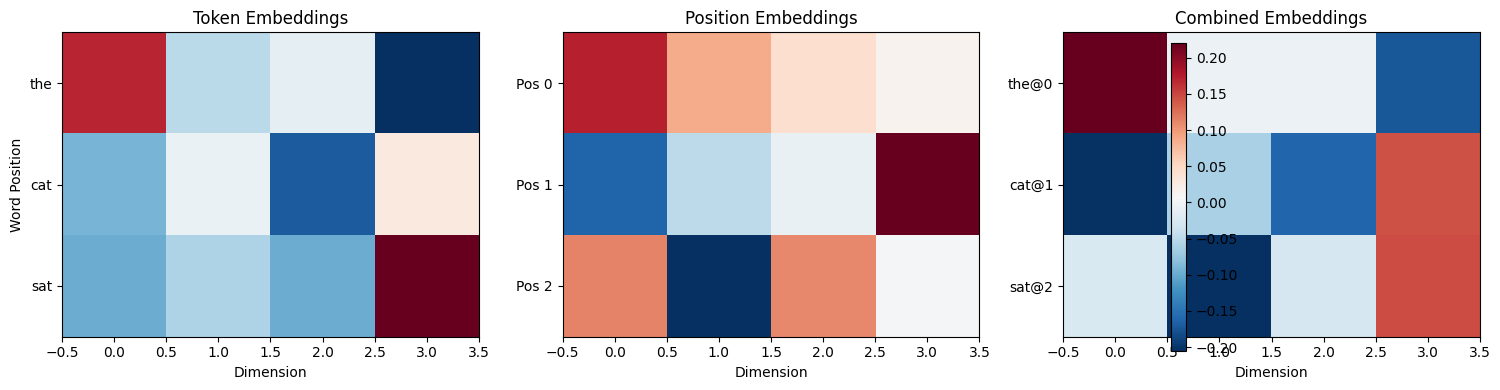

In [7]:
# Visualize how embeddings combine
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Token embeddings
axes[0].imshow(token_embs, cmap='RdBu_r', aspect='auto')
axes[0].set_title('Token Embeddings')
axes[0].set_ylabel('Word Position')
axes[0].set_xlabel('Dimension')
axes[0].set_yticks(range(3))
axes[0].set_yticklabels(['the', 'cat', 'sat'])

# Position embeddings
axes[1].imshow(pos_embs, cmap='RdBu_r', aspect='auto')
axes[1].set_title('Position Embeddings')
axes[1].set_xlabel('Dimension')
axes[1].set_yticks(range(3))
axes[1].set_yticklabels(['Pos 0', 'Pos 1', 'Pos 2'])

# Combined
im = axes[2].imshow(combined_embeddings, cmap='RdBu_r', aspect='auto')
axes[2].set_title('Combined Embeddings')
axes[2].set_xlabel('Dimension')
axes[2].set_yticks(range(3))
axes[2].set_yticklabels(['the@0', 'cat@1', 'sat@2'])

plt.colorbar(im, ax=axes)
plt.tight_layout()
plt.show()

## Part 3: Real BERT Embeddings

Now let's look at actual Mini-BERT embeddings:

In [8]:
from model import MiniBERT
from tokenizer import WordPieceTokenizer

# Load model and tokenizer
model = MiniBERT()

# Create tokenizer instance and load from file
tokenizer = WordPieceTokenizer()
tokenizer.load_model('../tokenizer_8k.pkl')

print(f"Mini-BERT Configuration:")
print(f"  Vocabulary size: {model.config.vocab_size}")
print(f"  Hidden size: {model.config.hidden_size}")
print(f"  Max sequence length: {model.config.max_sequence_length}")
print(f"\nToken embeddings shape: {model.params['token_embeddings'].shape}")
print(f"Position embeddings shape: {model.params['position_embeddings'].shape}")

Initialized Mini-BERT: 4,498,880 parameters (4.50M)
Tokenizer loaded from ../tokenizer_8k.pkl (799 tokens)
Mini-BERT Configuration:
  Vocabulary size: 8192
  Hidden size: 192
  Max sequence length: 64

Token embeddings shape: (8192, 192)
Position embeddings shape: (64, 192)


### Processing Real Text

In [9]:
# Process a real sentence
text = "The cat sat on the mat"
input_ids = tokenizer.encode(text)

print(f"Original text: '{text}'")
print(f"Token IDs: {input_ids}")
print(f"Decoded tokens: {tokenizer.decode(input_ids).split()}")

# Get embeddings using the correct parameter names
token_embeddings = model.params['token_embeddings'][input_ids]
position_embeddings = model.params['position_embeddings'][:len(input_ids)]
combined = token_embeddings + position_embeddings

print(f"\nToken embeddings shape: {token_embeddings.shape}")
print(f"Position embeddings shape: {position_embeddings.shape}")
print(f"Combined shape: {combined.shape}")

Original text: 'The cat sat on the mat'
Token IDs: [2, 62, 50, 798, 45, 43, 62, 61, 43, 62, 57, 56, 62, 50, 798, 55, 43, 62, 3]
Decoded tokens: ['t', 'h', 'e', 'c', 'a', 't', 's', 'a', 't', 'o', 'n', 't', 'h', 'e', 'm', 'a', 't']

Token embeddings shape: (19, 192)
Position embeddings shape: (19, 192)
Combined shape: (19, 192)


## Part 4: Why Are Embeddings Trainable?

Embeddings start random but learn meaningful representations during training.

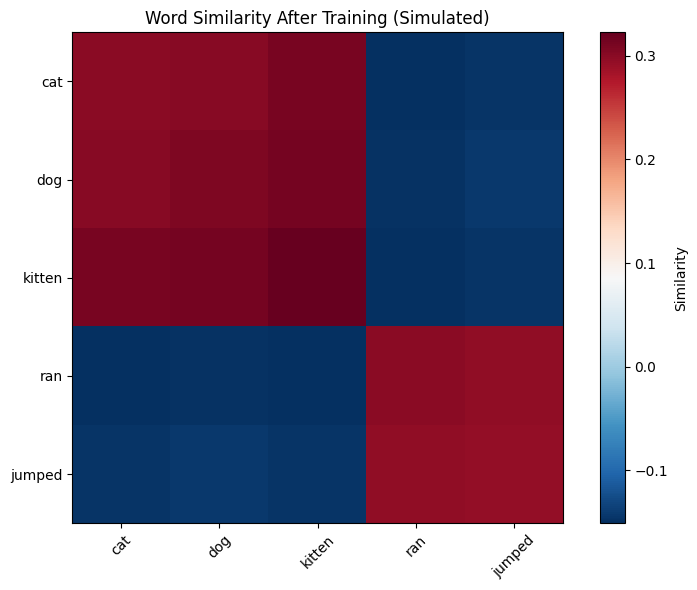

Notice how similar words (cat/dog/kitten) have high similarity!
This is what BERT learns during training.


In [10]:
# Simulate how embeddings might change during training
# (This is just for illustration)

# Before training: random
initial_embeddings = np.random.randn(5, 4) * 0.1

# After training: similar words have similar embeddings
trained_embeddings = np.array([
    [0.2, 0.1, -0.3, 0.4],   # 'cat'
    [0.25, 0.15, -0.28, 0.38], # 'dog' (similar to cat)
    [0.21, 0.12, -0.31, 0.41], # 'kitten' (similar to cat)
    [-0.4, 0.3, 0.2, -0.1],   # 'ran' (verb, different)
    [-0.38, 0.32, 0.18, -0.12] # 'jumped' (similar to ran)
])

words = ['cat', 'dog', 'kitten', 'ran', 'jumped']

# Compute similarity matrix (dot products)
similarity = trained_embeddings @ trained_embeddings.T

plt.figure(figsize=(8, 6))
plt.imshow(similarity, cmap='RdBu_r')
plt.colorbar(label='Similarity')
plt.xticks(range(5), words, rotation=45)
plt.yticks(range(5), words)
plt.title('Word Similarity After Training (Simulated)')
plt.tight_layout()
plt.show()

print("Notice how similar words (cat/dog/kitten) have high similarity!")
print("This is what BERT learns during training.")

## Part 5: Embedding Arithmetic

A fun property of good embeddings is that they can capture relationships:

In [11]:
# Simulate semantic embeddings (in real BERT, these emerge from training)
# This is just for illustration of the concept

semantic_embeddings = {
    'king': np.array([0.5, 0.3, 0.8, -0.2]),
    'queen': np.array([0.5, 0.3, -0.8, -0.2]),
    'man': np.array([0.2, 0.4, 0.7, 0.1]),
    'woman': np.array([0.2, 0.4, -0.7, 0.1])
}

# Famous example: king - man + woman ≈ queen
result = (semantic_embeddings['king'] - 
          semantic_embeddings['man'] + 
          semantic_embeddings['woman'])

print("Embedding arithmetic:")
print("king - man + woman =")
print(f"  {semantic_embeddings['king']}")
print(f"- {semantic_embeddings['man']}")
print(f"+ {semantic_embeddings['woman']}")
print(f"= {result}")
print(f"\nQueen embedding: {semantic_embeddings['queen']}")
print(f"\nAre they similar? The difference is:")
print(f"{result - semantic_embeddings['queen']}")
print("\n(In real embeddings, this would be approximately zero!)")

Embedding arithmetic:
king - man + woman =
  [ 0.5  0.3  0.8 -0.2]
- [0.2 0.4 0.7 0.1]
+ [ 0.2  0.4 -0.7  0.1]
= [ 0.5  0.3 -0.6 -0.2]

Queen embedding: [ 0.5  0.3 -0.8 -0.2]

Are they similar? The difference is:
[ 0.00000000e+00  0.00000000e+00  2.00000000e-01 -2.77555756e-17]

(In real embeddings, this would be approximately zero!)


## Summary: Key Takeaways

1. **Token Embeddings**: Convert word IDs to vectors via simple lookup
2. **Position Embeddings**: Add position information to preserve word order
3. **Combination**: Simple element-wise addition
4. **Training**: Embeddings start random but learn meaningful patterns
5. **Geometry**: Similar words end up with similar vectors

### Next Steps:
- Try changing the embedding dimensions
- Experiment with different initialization methods
- Visualize embeddings from a trained model
- Explore how embeddings change during training

## Exercises

1. **Embedding Lookup Speed**: Why is direct indexing `embedding_matrix[word_ids]` faster than a loop?

2. **Embedding Size**: Our toy example uses 4D embeddings. Mini-BERT uses 192D. Why might larger dimensions be better?

3. **Position Embeddings**: Why do you think BERT adds position embeddings instead of concatenating them?

4. **Initialization**: Currently embeddings start random. Research: What are better initialization strategies?

In [12]:
# Space for your experiments
